In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
inp_data = pd.read_csv('Inpatient_provdr.csv')

In [3]:
outp_data = pd.read_csv('Outpatient_provdr.csv')

In [4]:
Pathis_data = pd.read_csv('Patient_history.csv')

In [5]:
Trans_data = pd.read_csv('Transaction_coo.csv')

# Data Info

In [6]:
inp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   DRG Definition                              163065 non-null  object 
 1   Provider Id                                 163065 non-null  int64  
 2   Provider Name                               163065 non-null  object 
 3   Provider Street Address                     163065 non-null  object 
 4   Provider City                               163065 non-null  object 
 5   Provider State                              163065 non-null  object 
 6   Provider Zip Code                           163065 non-null  int64  
 7   Hospital Referral Region (HRR) Description  163065 non-null  object 
 8   Total Discharges                            163065 non-null  int64  
 9   Average Covered Charges                     163065 non-null  float64
 

In [7]:
inp_data.shape

(163065, 12)

In [8]:
print(inp_data.columns)

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region (HRR) Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')


In [9]:
outp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   APC                                         43372 non-null  object 
 1   Provider Id                                 43372 non-null  int64  
 2   Provider Name                               43372 non-null  object 
 3   Provider Street Address                     43372 non-null  object 
 4   Provider City                               43372 non-null  object 
 5   Provider State                              43372 non-null  object 
 6   Provider Zip Code                           43372 non-null  int64  
 7   Hospital Referral Region (HRR) Description  43372 non-null  object 
 8   Outpatient Services                         43372 non-null  int64  
 9   Average  Estimated Submitted Charges        43372 non-null  float64
 10  Average To

In [10]:
outp_data.shape

(43372, 11)

In [11]:
print(outp_data.columns)

Index(['APC', 'Provider Id', 'Provider Name', 'Provider Street Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Hospital Referral Region (HRR) Description', 'Outpatient Services',
       'Average  Estimated Submitted Charges', 'Average Total Payments'],
      dtype='object')


In [12]:
Pathis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      500000 non-null  int64 
 1   age     497470 non-null  object
 2   gender  500000 non-null  object
 3   income  497469 non-null  object
dtypes: int64(1), object(3)
memory usage: 15.3+ MB


In [13]:
Pathis_data.shape

(500000, 4)

In [14]:
print(Pathis_data.columns)

Index(['id', 'age', 'gender', 'income'], dtype='object')


In [15]:
Trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514809 entries, 0 to 1514808
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   id              1514809 non-null  int64
 1   global_proc_id  1514809 non-null  int64
 2   count           1514809 non-null  int64
dtypes: int64(3)
memory usage: 34.7 MB


In [16]:
Trans_data.shape

(1514809, 3)

In [17]:
print(Trans_data.columns)

Index(['id', 'global_proc_id', 'count'], dtype='object')


# Data Cleaning

In [26]:
# Find duplicate rows based on specified columns
duplicate_rows = inp_data.duplicated(subset=['DRG Definition', 'Provider Id', 'Provider Name',
                                      'Provider Street Address', 'Provider City', 'Provider State',
                                      'Provider Zip Code', 'Hospital Referral Region (HRR) Description',
                                      'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
                                      'Average Medicare Payments'])

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Print the number of duplicate rows
print("Number of Duplicate Rows:", num_duplicates)

# Print the duplicate rows
print("Duplicate Rows:")
print(inp_data[duplicate_rows])

Number of Duplicate Rows: 0
Duplicate Rows:
Empty DataFrame
Columns: [DRG Definition, Provider Id, Provider Name, Provider Street Address, Provider City, Provider State, Provider Zip Code, Hospital Referral Region (HRR) Description, Total Discharges, Average Covered Charges, Average Total Payments, Average Medicare Payments]
Index: []


In [10]:
# Find duplicate rows based on specified columns
duplicate1_rows = outp_data.duplicated(subset=['APC', 'Provider Id', 'Provider Name', 'Provider Street Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Hospital Referral Region (HRR) Description', 'Outpatient Services',
       'Average  Estimated Submitted Charges', 'Average Total Payments'])

# Count the number of duplicate rows
num_duplicates1 = duplicate1_rows.sum()

# Print the number of duplicate rows
print("Number of Duplicate Rows:", num_duplicates1)

# Print the duplicate rows
print("Duplicate Rows:")
print(outp_data[duplicate1_rows])

Number of Duplicate Rows: 0
Duplicate Rows:
Empty DataFrame
Columns: [APC, Provider Id, Provider Name, Provider Street Address, Provider City, Provider State, Provider Zip Code, Hospital Referral Region (HRR) Description, Outpatient Services, Average  Estimated Submitted Charges, Average Total Payments]
Index: []


In [16]:
#Find duplicate rows based on specified columns
duplicate2_rows = Pathis_data.duplicated(subset=['id', 'age', 'gender', 'income'])

# Count the number of duplicate rows
num_duplicates2 = duplicate2_rows.sum()

# Print the number of duplicate rows
print("Number of Duplicate Rows:", num_duplicates2)

# Print the duplicate rows
print("Duplicate Rows:")
print(Pathis_data[duplicate2_rows])

Number of Duplicate Rows: 0
Duplicate Rows:
Empty DataFrame
Columns: [id, age, gender, income]
Index: []


In [7]:
#Find duplicate rows based on sepcified column
duplicate3_rows = Trans_data.duplicated(subset=['id', 'global_proc_id', 'count'])

In [8]:
# count the number of duplicate rows
num_duplicates3 = duplicate3_rows.sum()

#print the number pf duplicate rows 
print('Number of Duplicate Rows:', num_duplicates3)

#print the duplicate rows
print("Duplicate Rows:")
print(Trans_data[duplicate3_rows])

Number of Duplicate Rows: 0
Duplicate Rows:
Empty DataFrame
Columns: [id, global_proc_id, count]
Index: []


The are no duplicates in these data sets

Checking for null in all the columns in data set

In [9]:
# Check for null values in specified columns
null_values = inp_data[['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region (HRR) Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments']].isnull().sum()

# Print the null values
print("Null Values:")
print(null_values)

Null Values:
DRG Definition                                0
Provider Id                                   0
Provider Name                                 0
Provider Street Address                       0
Provider City                                 0
Provider State                                0
Provider Zip Code                             0
Hospital Referral Region (HRR) Description    0
Total Discharges                              0
Average Covered Charges                       0
Average Total Payments                        0
Average Medicare Payments                     0
dtype: int64


In [11]:
# Check for null values in specified columns
null_values1 = outp_data[['APC', 'Provider Id', 'Provider Name', 'Provider Street Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Hospital Referral Region (HRR) Description', 'Outpatient Services',
       'Average  Estimated Submitted Charges', 'Average Total Payments']].isnull().sum()

# Print the null values
print("Null Values:")
print(null_values1)

Null Values:
APC                                           0
Provider Id                                   0
Provider Name                                 0
Provider Street Address                       0
Provider City                                 0
Provider State                                0
Provider Zip Code                             0
Hospital Referral Region (HRR) Description    0
Outpatient Services                           0
Average  Estimated Submitted Charges          0
Average Total Payments                        0
dtype: int64


In [20]:
#check for null values in specified columns
null_values2 = Pathis_data[['id', 'age', 'gender', 'income']].isnull().sum()

# print the null values
print("null values:")
print(null_values2)

null values:
id           0
age       2530
gender       0
income    2531
dtype: int64


In [9]:
# Delete rows with null values
Pathis_data.dropna(inplace=True)

In [10]:
#check for null values in specified columns
null_values2 = Pathis_data[['id', 'age', 'gender', 'income']].isnull().sum()

# print the null values
print("null values:")
print(null_values2)

null values:
id        0
age       0
gender    0
income    0
dtype: int64


In [11]:
# Save the cleaned DataFrame to a CSV file
Pathis_data.to_csv('cPathis_data.csv', index=False)

In [25]:
#check for null values in specified columns
null_values3 = Trans_data[['id', 'global_proc_id', 'count']].isnull().sum()

# print the null values
print("null values:")
print(null_values3)

null values:
id                0
global_proc_id    0
count             0
dtype: int64


In [6]:
Pathis_data1 = pd.read_csv('cPathis_data.csv')

# EDA

In [13]:
# Calculate summary statistics for numerical columns
summary_stats = inp_data[['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']].describe()

# Print the summary statistics
print(summary_stats)

       Total Discharges  Average Covered Charges  Average Total Payments  \
count     163065.000000            163065.000000           163065.000000   
mean          42.776304             36133.958434             9707.477867   
std           51.104042             35065.365905             7664.642652   
min           11.000000              2459.400000             2673.000000   
25%           17.000000             15947.166670             5234.500000   
50%           27.000000             25245.823530             7214.100000   
75%           49.000000             43232.592590            11286.400000   
max         3383.000000            929118.909100           156158.181800   

       Average Medicare Payments  
count              163065.000000  
mean                 8494.495174  
std                  7309.467247  
min                  1148.909091  
25%                  4192.354839  
50%                  6158.465116  
75%                 10056.882350  
max                154620.818200  


In [19]:
# Calculate mean for each column
mean_values = inp_data[['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']].mean()
# Print the calculated statistics
print("Mean:")
print(mean_values)

Mean:
Total Discharges                42.776304
Average Covered Charges      36133.958434
Average Total Payments        9707.477867
Average Medicare Payments     8494.495174
dtype: float64


In [20]:
# Calculate median for each column
median_values = inp_data[['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']].median()
print("\nMedian:")
print(median_values)


Median:
Total Discharges                27.000000
Average Covered Charges      25245.823530
Average Total Payments        7214.100000
Average Medicare Payments     6158.465116
dtype: float64


In [21]:
# Calculate minimum for each column
min_values = inp_data[['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']].min()
print("\nMinimum:")
print(min_values)


Minimum:
Total Discharges               11.000000
Average Covered Charges      2459.400000
Average Total Payments       2673.000000
Average Medicare Payments    1148.909091
dtype: float64


In [22]:
# Calculate maximum for each column
max_values = inp_data[['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']].max()
print("\nMaximum:")
print(max_values)


Maximum:
Total Discharges               3383.0000
Average Covered Charges      929118.9091
Average Total Payments       156158.1818
Average Medicare Payments    154620.8182
dtype: float64


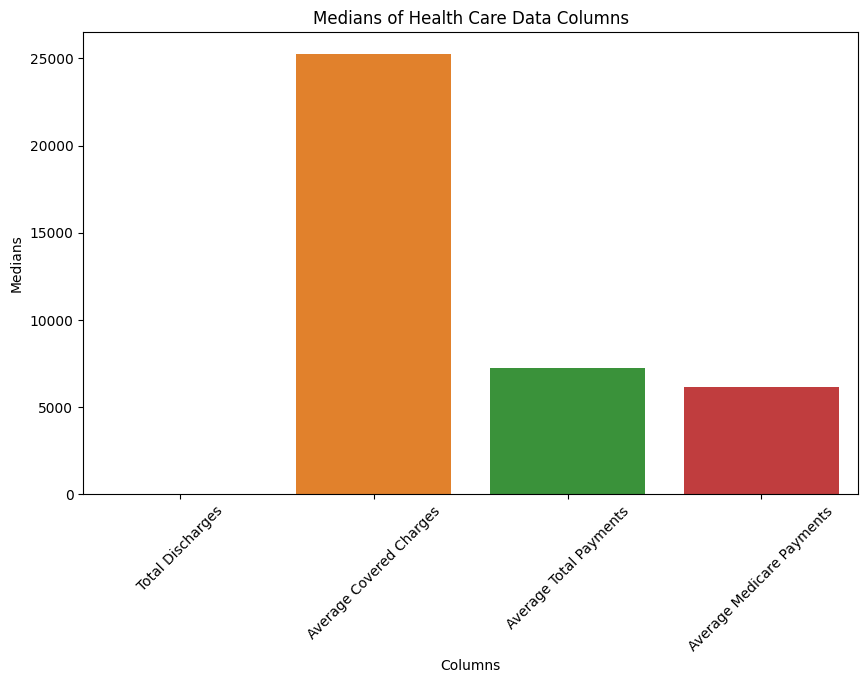

In [24]:

# Create a DataFrame with the column names and their respective medians
columns = ['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']
medians = [inp_data[column].median() for column in columns]
data = pd.DataFrame({'Columns': columns, 'Medians': medians})

# Plot the medians using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Columns', y='Medians', data=data)
plt.title('Medians of Health Care Data Columns')
plt.xlabel('Columns')
plt.ylabel('Medians')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [27]:
# Find unique values in 'DRG Definition'
unique_drg = inp_data['DRG Definition'].unique()
print("Unique DRG Definitions:")
print(unique_drg)
print()

Unique DRG Definitions:
['039 - EXTRACRANIAL PROCEDURES W/O CC/MCC'
 '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC'
 '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC'
 '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC'
 '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC'
 '069 - TRANSIENT ISCHEMIA'
 '074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC'
 '101 - SEIZURES W/O MCC' '149 - DYSEQUILIBRIUM'
 '176 - PULMONARY EMBOLISM W/O MCC'
 '177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC'
 '178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC'
 '189 - PULMONARY EDEMA & RESPIRATORY FAILURE'
 '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC'
 '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC'
 '192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC'
 '193 - SIMPLE PNEUMONIA & PLEURISY W MCC'
 '194 - SIMPLE PNEUMONIA & PLEURISY W CC'
 '195 - SIMPLE PNEUMONIA & PLEURISY W/O CC/MCC'
 '202 - BRONCHITIS & ASTHMA W CC/MCC'
 '203 - BRONCHITIS & ASTHMA W/O 

In [28]:
# Find unique values in 'Provider Name'
unique_provider = inp_data['Provider Name'].unique()
print("Unique Provider Names:")
print(unique_provider)
print()

Unique Provider Names:
['SOUTHEAST ALABAMA MEDICAL CENTER' 'MARSHALL MEDICAL CENTER SOUTH'
 'ELIZA COFFEE MEMORIAL HOSPITAL' ... 'KENSINGTON HOSPITAL'
 'VALLEY FORGE MEDICAL CENTER AND HOSPITAL' 'EAGLEVILLE HOSPITAL']



In [29]:
# Find unique values in 'Provider City'
unique_city = inp_data['Provider City'].unique()
print("Unique Provider Cities:")
print(unique_city)

Unique Provider Cities:
['DOTHAN' 'BOAZ' 'FLORENCE' ... 'HAMLIN' 'CATAWBA' 'EAGLEVILLE']


In [34]:
# Find the value counts of each unique value in the 'DRG Definition' column
drg_counts = inp_data['DRG Definition'].value_counts()

# Find the 4 most presented values
most_presented = drg_counts.head(4)

# Find the 4 least presented values
least_presented = drg_counts.tail(4)

print("Most Presented Values:")
print(most_presented)

print("\nLeast Presented Values:")
print(least_presented)

Most Presented Values:
194 - SIMPLE PNEUMONIA & PLEURISY W CC                          3023
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                 2989
292 - HEART FAILURE & SHOCK W CC                                2953
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC    2950
Name: DRG Definition, dtype: int64

Least Presented Values:
473 - CERVICAL SPINAL FUSION W/O CC/MCC                         846
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC                  843
251 - PERC CARDIOVASC PROC W/O CORONARY ARTERY STENT W/O MCC    727
885 - PSYCHOSES                                                 613
Name: DRG Definition, dtype: int64


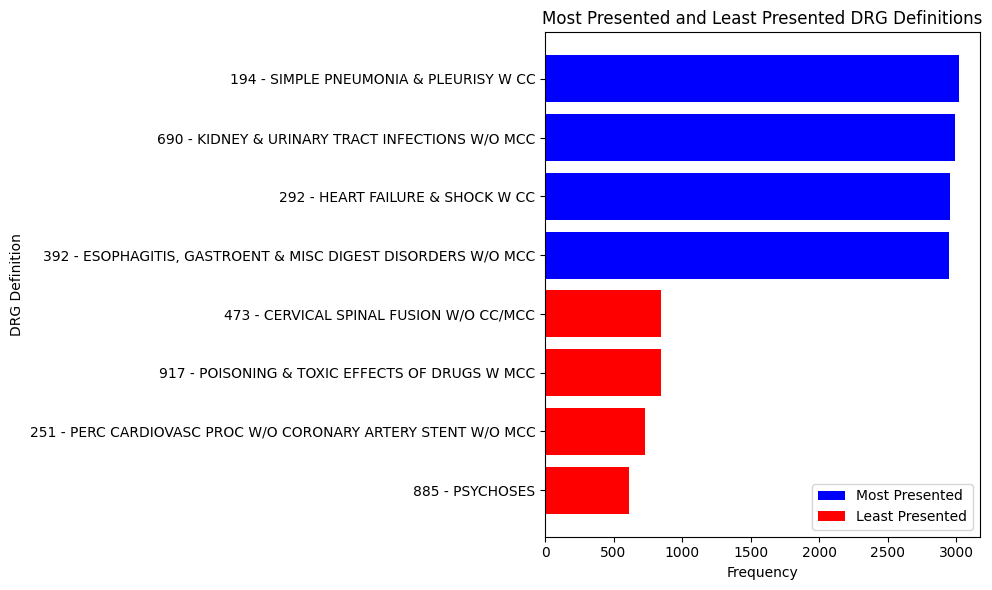

In [35]:
# Define the most presented values
most_presented_values = most_presented.index.tolist()
most_presented_counts = most_presented.values.tolist()

# Define the least presented values
least_presented_values = least_presented.index.tolist()
least_presented_counts = least_presented.values.tolist()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the most presented values
ax.barh(most_presented_values, most_presented_counts, color='blue', label='Most Presented')

# Plot the least presented values
ax.barh(least_presented_values, least_presented_counts, color='red', label='Least Presented')

# Set labels and title
ax.set_xlabel('Frequency')
ax.set_ylabel('DRG Definition')
ax.set_title('Most Presented and Least Presented DRG Definitions')

# Invert the y-axis to show values from top to bottom
ax.invert_yaxis()

# Show the legend
ax.legend()

# Adjust the layout to prevent overlapping of labels
plt.tight_layout()

# Display the chart
plt.show()

In [37]:
# Find the most presented provider names
most_presented_provider_names = inp_data['Provider Name'].value_counts().head(4)

# Find the least presented provider names
least_presented_provider_names = inp_data['Provider Name'].value_counts().tail(4)

# Find the most presented provider cities
most_presented_provider_cities = inp_data['Provider City'].value_counts().head(4)

# Find the least presented provider cities
least_presented_provider_cities = inp_data['Provider City'].value_counts().tail(4)

# Print the results
print("Most Presented Provider Names:")
print(most_presented_provider_names)
print("\nLeast Presented Provider Names:")
print(least_presented_provider_names)
print("\nMost Presented Provider Cities:")
print(most_presented_provider_cities)
print("\nLeast Presented Provider Cities:")
print(least_presented_provider_cities)

Most Presented Provider Names:
GOOD SAMARITAN HOSPITAL     633
ST JOSEPH MEDICAL CENTER    427
MERCY MEDICAL CENTER        357
MERCY HOSPITAL              347
Name: Provider Name, dtype: int64

Least Presented Provider Names:
FAIRWAY MEDICAL CENTER       1
MONROE SURGICAL HOSPITAL     1
PHYSICIANS MEDICAL CENTER    1
EAGLEVILLE HOSPITAL          1
Name: Provider Name, dtype: int64

Most Presented Provider Cities:
CHICAGO         1505
BALTIMORE       1059
HOUSTON          950
PHILADELPHIA     898
Name: Provider City, dtype: int64

Least Presented Provider Cities:
PINE RIDGE    1
SITKA         1
EDMOND        1
EAGLEVILLE    1
Name: Provider City, dtype: int64


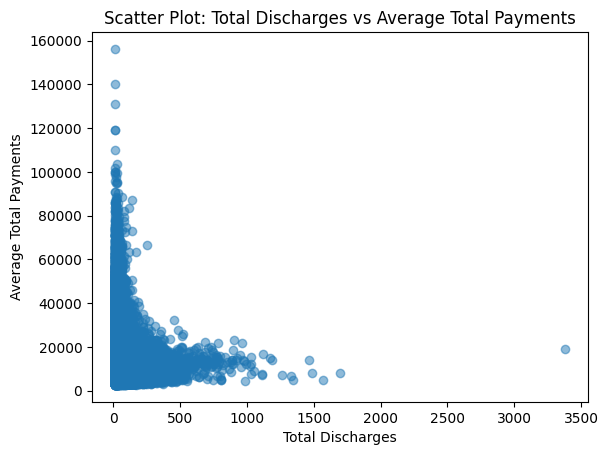

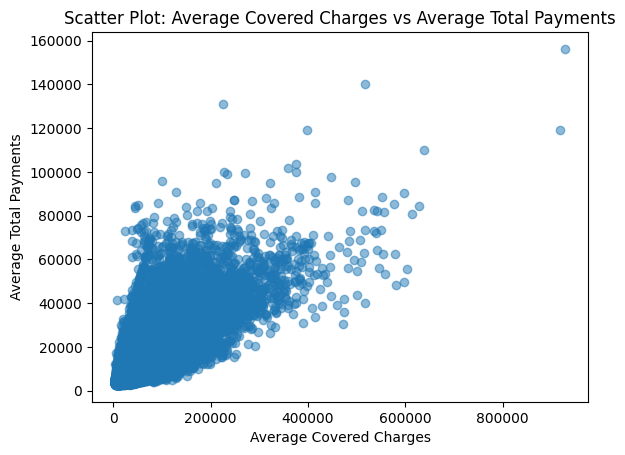

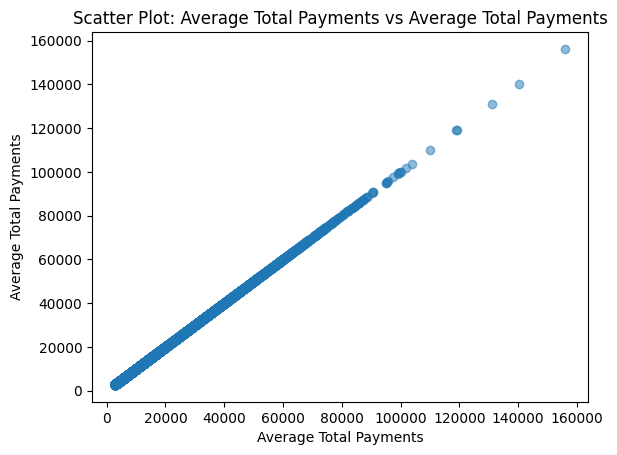

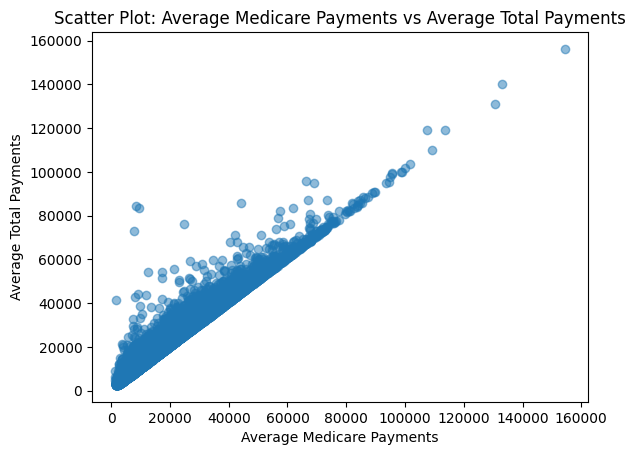

In [38]:
# Select the numerical columns
numerical_columns = ['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

# Create scatter plots
for column in numerical_columns:
    plt.scatter(inp_data[column], inp_data['Average Total Payments'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Average Total Payments')
    plt.title(f'Scatter Plot: {column} vs Average Total Payments')
    plt.show()

C:\Users\Nabeel\AppData\Local\Temp\ipykernel_2368\2129429866.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = outp_data[numerical_columns].corr()


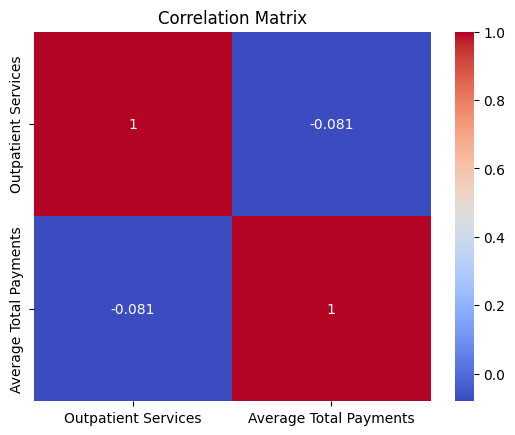

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical columns of interest
numerical_columns = ['APC', 'Outpatient Services', 'Average Total Payments']

# Correlation matrix
correlation_matrix = outp_data[numerical_columns].corr()

# Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [42]:
# Calculate summary statistics for numerical columns
summary_stats = outp_data[['APC', 'Provider Id', 'Provider Name', 'Provider Street Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Hospital Referral Region (HRR) Description', 'Outpatient Services',
       'Average  Estimated Submitted Charges', 'Average Total Payments']].describe()

# Print the summary statistics
print(summary_stats)

         Provider Id  Provider Zip Code  Outpatient Services  \
count   43372.000000       43372.000000         43372.000000   
mean   265410.921747       49041.022434           587.980955   
std    152729.927698       27497.899751          3280.397168   
min     10001.000000        1040.000000            11.000000   
25%    140043.000000       28645.000000            42.000000   
50%    260091.000000       46342.000000           128.000000   
75%    390101.000000       73101.000000           347.000000   
max    670061.000000       99801.000000        219042.000000   

       Average  Estimated Submitted Charges  Average Total Payments  
count                          43372.000000            43372.000000  
mean                            1473.994047              265.425586  
std                             1837.530791              261.260146  
min                               12.643750                7.305000  
25%                              284.610498               74.627714  
50%

In [44]:
unique_providers = outp_data['Provider Name'].unique()
print("Unique Providers:")
for provider in unique_providers:
    print(provider)

Unique Providers:
EAST ALABAMA MEDICAL CENTER AND SNF
CENTRAL PENINSULA GENERAL HOSPITAL
UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE
BANNER BAYWOOD MEDICAL CENTER
UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE
UAMS MEDICAL CENTER
NORTH ARKANSAS REGIONAL MEDICAL CENTER
BAPTIST HEALTH MEDICAL CENTER NORTH LITTLE ROCK
SPARKS REGIONAL MEDICAL CENTER
NEA BAPTIST MEMORIAL HOSPITAL
WHITE RIVER MEDICAL CENTER
MERCY GENERAL HOSPITAL
UNIVERSITY OF CALIFORNIA SAN DIEGO MEDICAL CENTER
SANTA CLARA VALLEY MEDICAL CENTER
SAINT AGNES MEDICAL CENTER
EMANUEL MEDICAL CENTER INC
GARDEN GROVE HOSPITAL & MEDICAL CENTER
RONALD REAGAN UCLA MEDICAL CENTER
MERCY MEDICAL CENTER REDDING
SONORA REGIONAL MEDICAL CENTER
UNIVERSITY OF CALIFORNIA IRVINE MED CENTER
NORTHBAY MEDICAL CENTER
COMMUNITY MEMORIAL HOSPITAL SAN BUENAVENTURA
SUTTER COAST HOSPITAL
COLUSA REGIONAL MEDICAL CENTER
STANFORD HOSPITAL
UCSF MEDICAL CENTER
ST MARY'S MEDICAL CENTER
EISENHOWER MEDICAL CENTER
LA PALMA INTERCOMMUNITY HOSPITAL
UNIVER

In [45]:
top_10_providers = outp_data['Provider Name'].value_counts().head(10)
print("Top 10 Most Presented Unique Providers:")
print(top_10_providers)

Top 10 Most Presented Unique Providers:
GOOD SAMARITAN HOSPITAL      116
ST JOSEPH MEDICAL CENTER     111
ST JOSEPH HOSPITAL           106
MERCY HOSPITAL                87
MERCY MEDICAL CENTER          82
MEMORIAL HOSPITAL             78
ST FRANCIS MEDICAL CENTER     75
ST MARY'S MEDICAL CENTER      72
ST MARYS HOSPITAL             69
ST FRANCIS HOSPITAL           67
Name: Provider Name, dtype: int64


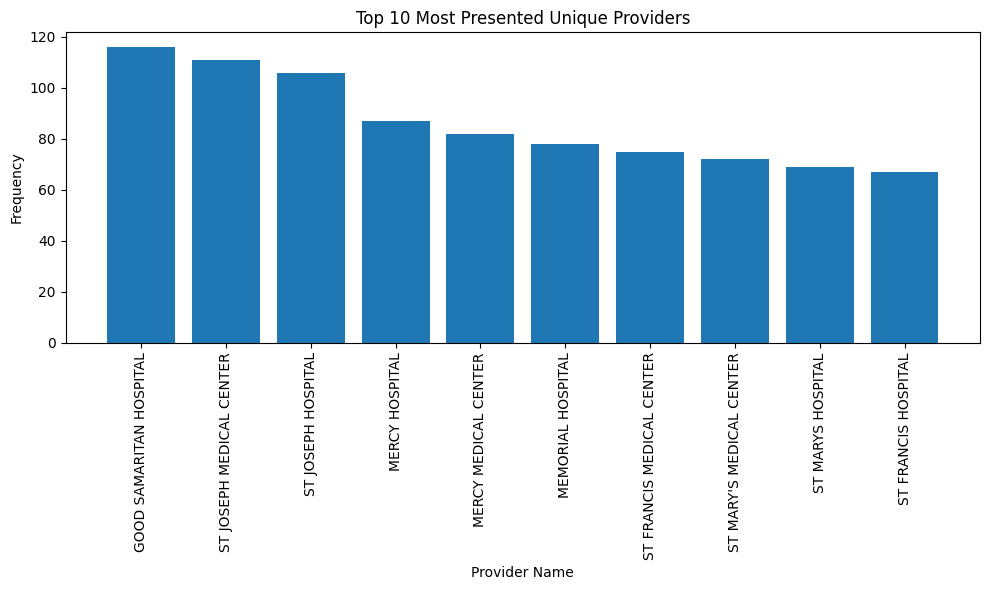

In [46]:
top_10_providers = outp_data['Provider Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_providers.index, top_10_providers.values)
plt.xticks(rotation=90)
plt.xlabel('Provider Name')
plt.ylabel('Frequency')
plt.title('Top 10 Most Presented Unique Providers')
plt.tight_layout()
plt.show()

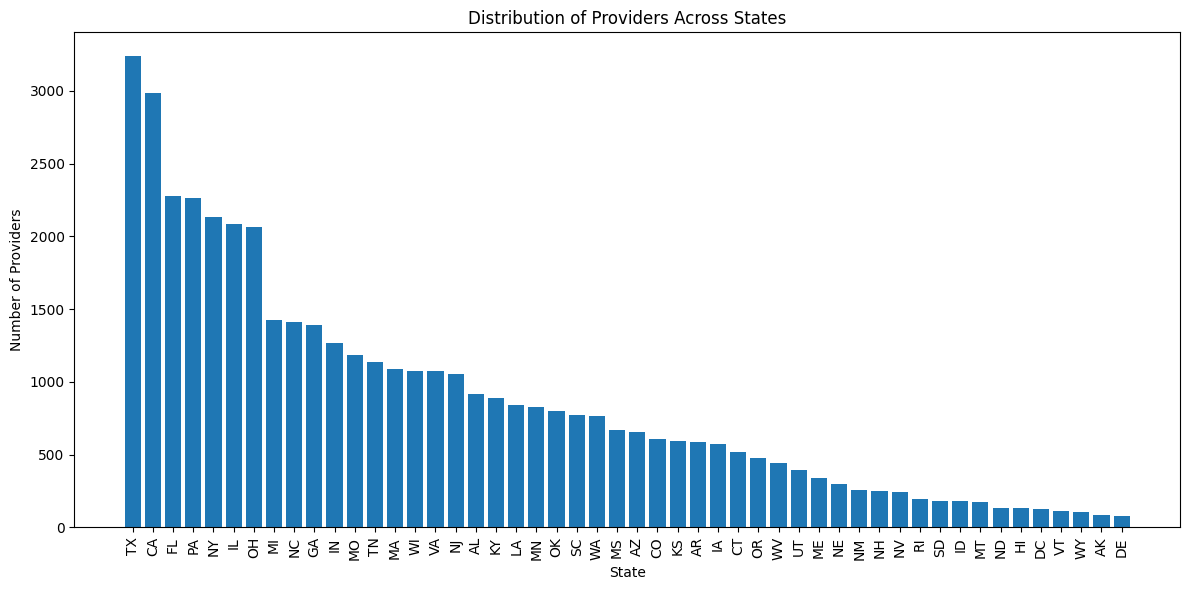

In [47]:
# Distribution of providers across states
providers_by_state = outp_data['Provider State'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(providers_by_state.index, providers_by_state.values)
plt.xlabel('State')
plt.ylabel('Number of Providers')
plt.title('Distribution of Providers Across States')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

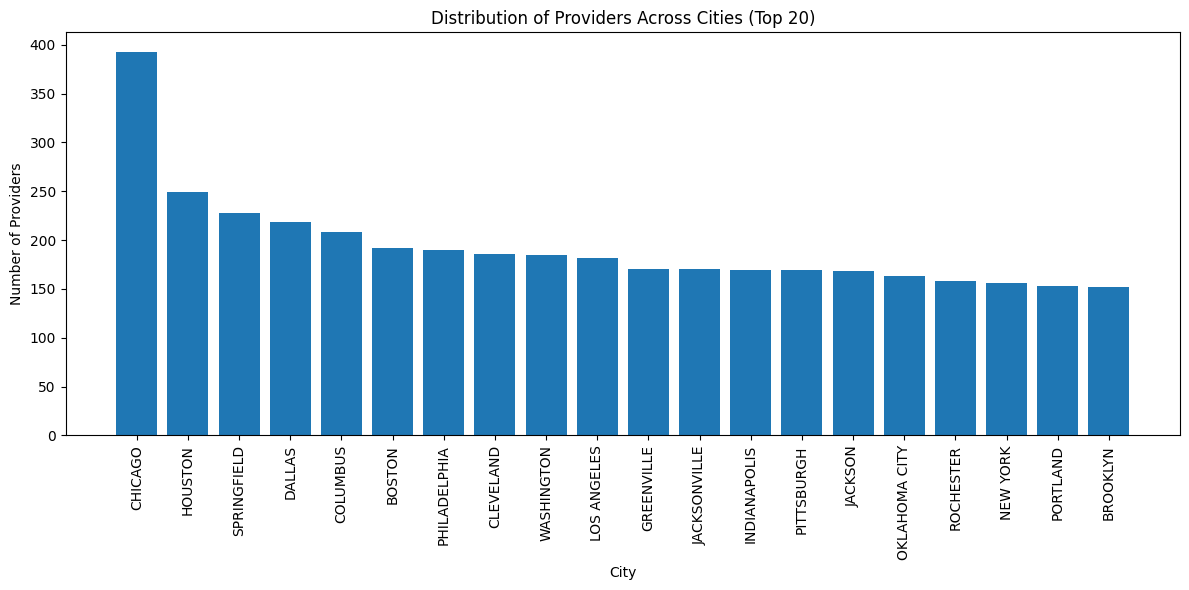

In [48]:
# Distribution of providers across cities
providers_by_city = outp_data['Provider City'].value_counts().head(20)

plt.figure(figsize=(12, 6))
plt.bar(providers_by_city.index, providers_by_city.values)
plt.xlabel('City')
plt.ylabel('Number of Providers')
plt.title('Distribution of Providers Across Cities (Top 20)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

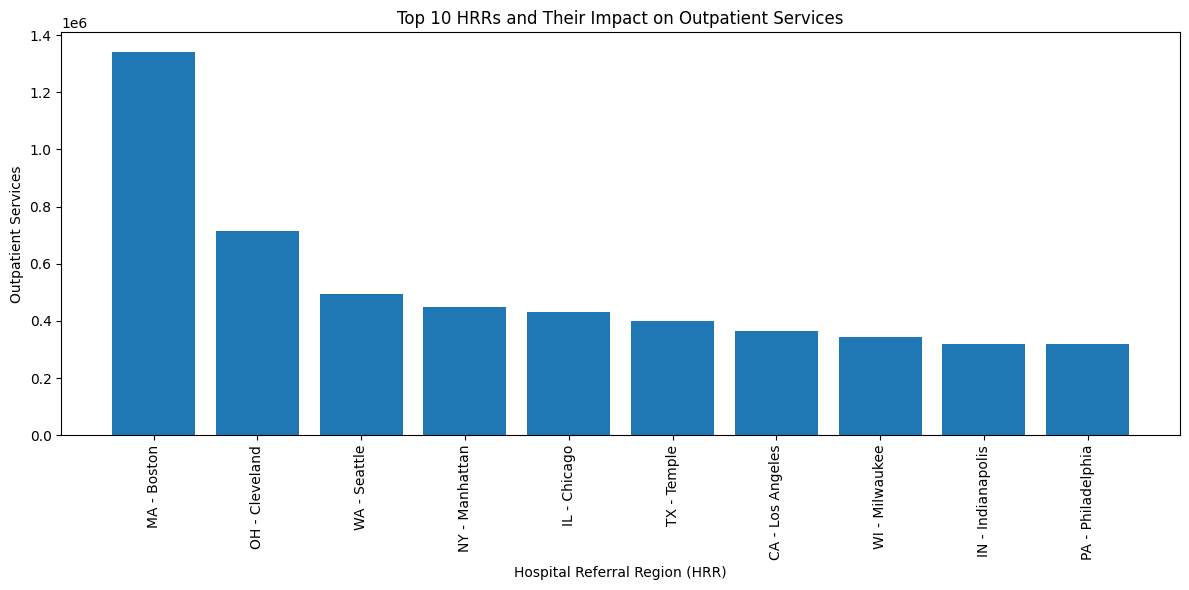

In [49]:
# Impact of Hospital Referral Regions (HRR) on outpatient services
hrr_outpatient_services = outp_data.groupby('Hospital Referral Region (HRR) Description')['Outpatient Services'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(hrr_outpatient_services.index, hrr_outpatient_services.values)
plt.xlabel('Hospital Referral Region (HRR)')
plt.ylabel('Outpatient Services')
plt.title('Top 10 HRRs and Their Impact on Outpatient Services')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

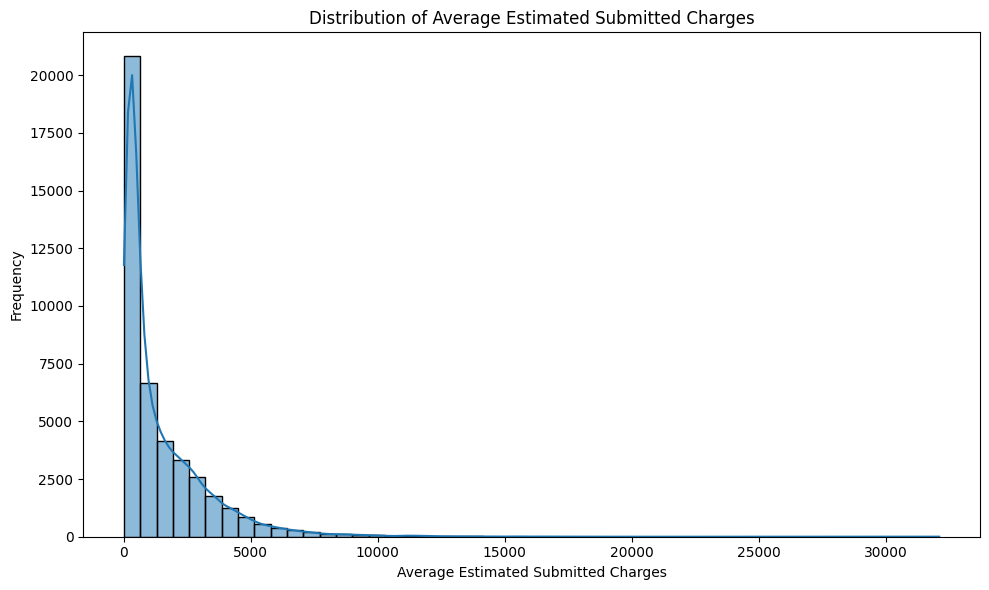

In [50]:
# Distribution of Average Estimated Submitted Charges
plt.figure(figsize=(10, 6))
sns.histplot(data=outp_data, x='Average  Estimated Submitted Charges', bins=50, kde=True)
plt.xlabel('Average Estimated Submitted Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Average Estimated Submitted Charges')
plt.tight_layout()
plt.show()

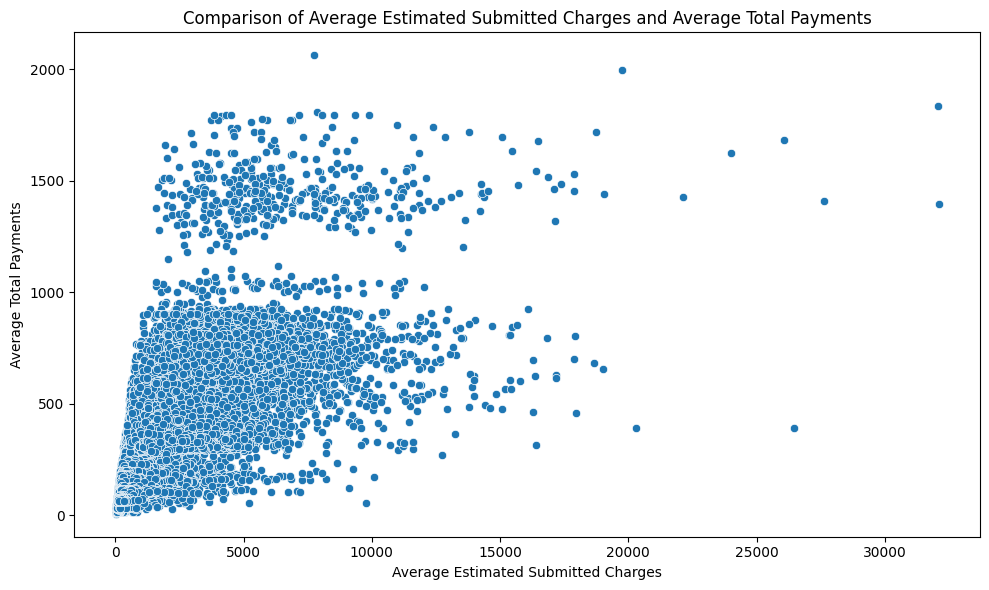

In [51]:
# Scatter plot of Average Estimated Submitted Charges vs Average Total Payments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=outp_data, x='Average  Estimated Submitted Charges', y='Average Total Payments')
plt.xlabel('Average Estimated Submitted Charges')
plt.ylabel('Average Total Payments')
plt.title('Comparison of Average Estimated Submitted Charges and Average Total Payments')
plt.tight_layout()
plt.show()

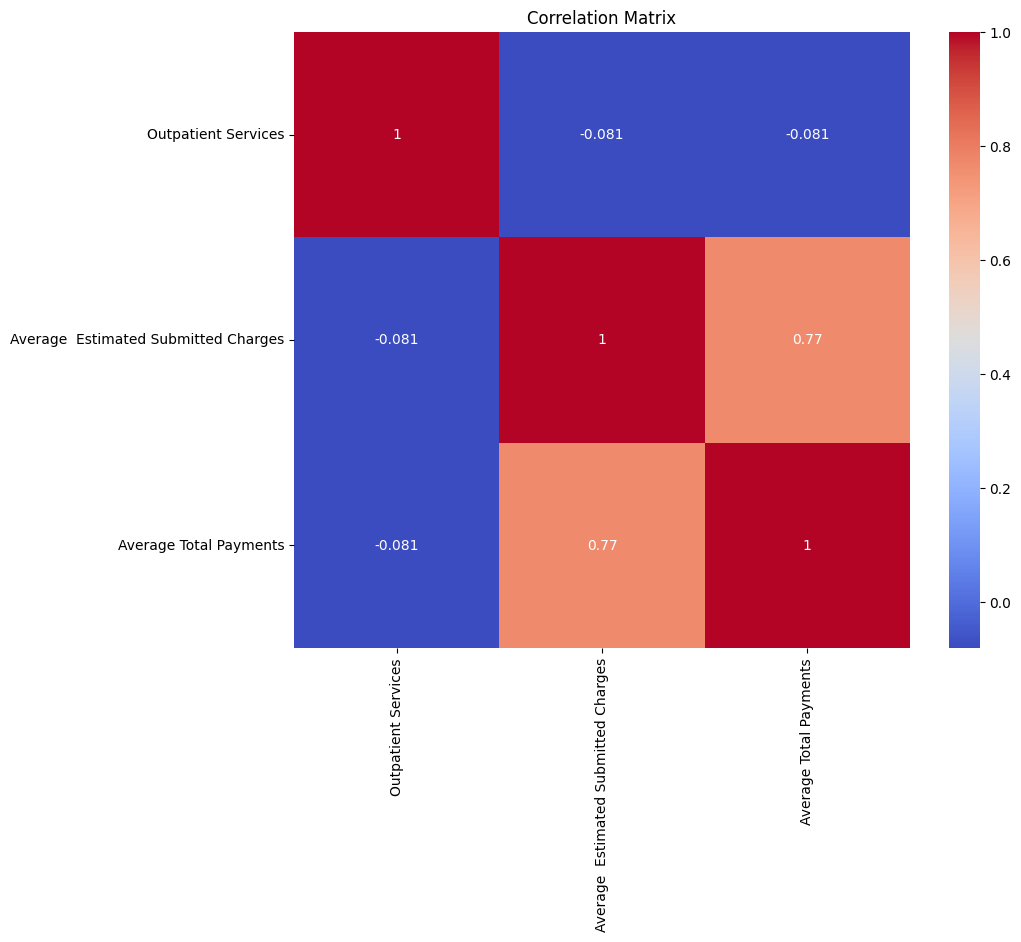

In [52]:
#relevant columns for analysis
columns_of_interest = ['Outpatient Services', 'Average  Estimated Submitted Charges', 'Average Total Payments']
numeric_data = outp_data[columns_of_interest]

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Hypothesis 1: The average estimated submitted charges vary significantly between different providers or provider types.

In [9]:
# Group the data by Provider Name or Provider Type and calculate the average estimated submitted charges
average_charges = outp_data.groupby(['Provider Name'])['Average  Estimated Submitted Charges'].mean()

# Sort the charges in descending order
sorted_charges = average_charges.sort_values(ascending=False)

# Display the top 10 providers or provider types with the highest average charges
top_10_providers = sorted_charges.head(10)

print("Top 10 Providers with Highest Average Estimated Submitted Charges:")
print(top_10_providers)

Top 10 Providers with Highest Average Estimated Submitted Charges:
Provider Name
EAST VALLEY HOSPITAL MEDICAL CENTER            10836.473330
FIRST STREET HOSPITAL LP                        9498.550769
RENAISSANCE HOSPITAL TERRELL                    7637.296667
TOPS SURGICAL SPECIALTY HOSPITAL                7044.643980
FORT WALTON BEACH MEDICAL CENTER                7016.688532
SPRING VALLEY HOSPITAL MEDICAL CENTER           6735.408347
BRANDON REGIONAL HOSPITAL                       5717.862895
MEADOWLANDS HOSPITAL MEDICAL CENTER             5669.137325
MEMORIAL HERMANN SURGICAL HOSPITAL KINGWOOD     5568.564596
HOUSTON PHYSICIANS' HOSPITAL                    5462.427575
Name: Average  Estimated Submitted Charges, dtype: float64


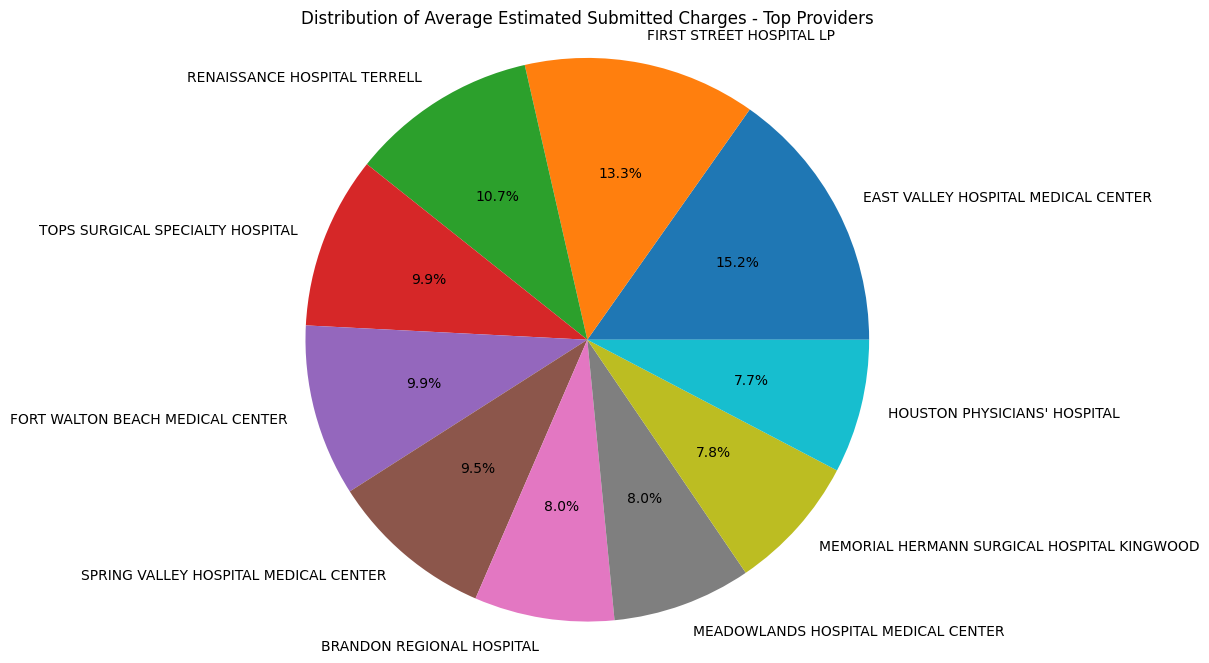

In [12]:
# Plot the top providers with a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_providers.values, labels=top_10_providers.index, autopct='%1.1f%%')
plt.title('Distribution of Average Estimated Submitted Charges - Top Providers')
plt.axis('equal')
plt.show()

# Hypothesis 2: There is a correlation between the number of outpatient services provided and the average total payments received.

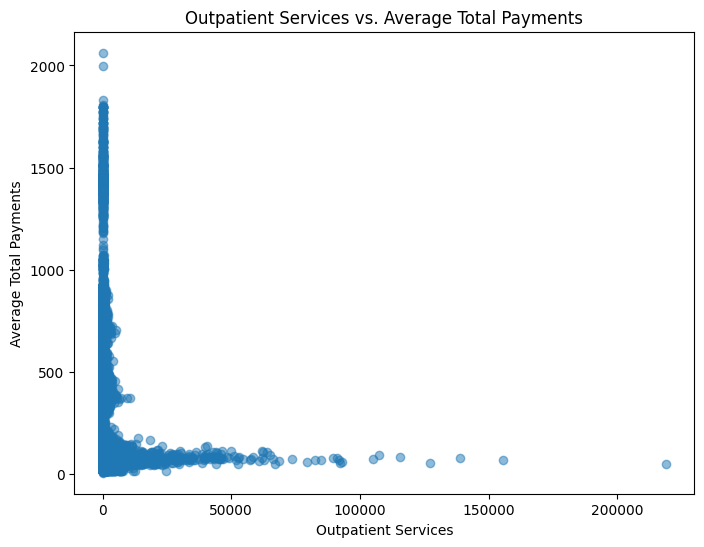

In [13]:
# Scatter plot of outpatient services vs. average total payments
plt.figure(figsize=(8, 6))
plt.scatter(outp_data['Outpatient Services'], outp_data['Average Total Payments'], alpha=0.5)
plt.xlabel('Outpatient Services')
plt.ylabel('Average Total Payments')
plt.title('Outpatient Services vs. Average Total Payments')
plt.show()

# Hypothesis 3: The distribution of charges and payments differs across different geographic regions or hospital referral regions.

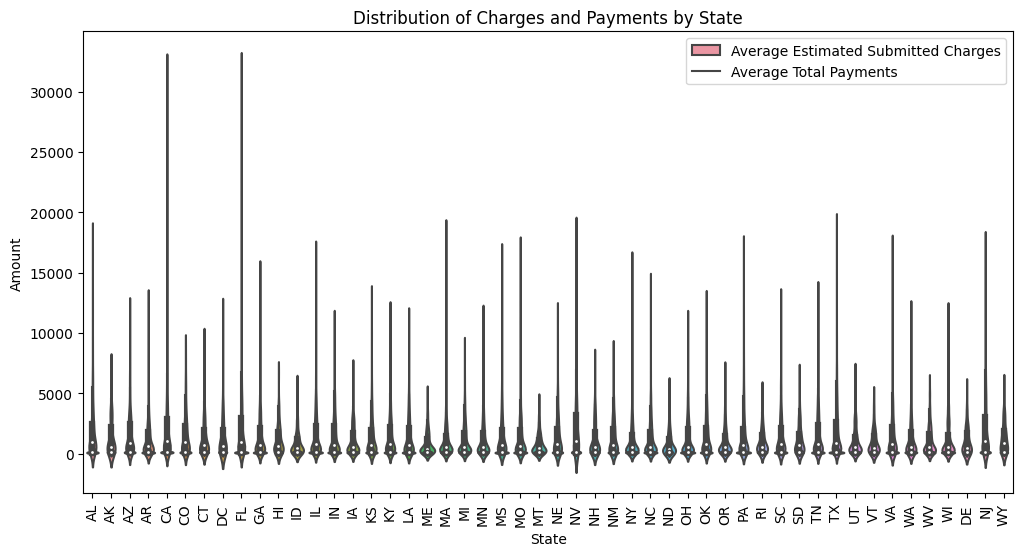

In [15]:
# Violin plot of charges and payments by state
plt.figure(figsize=(12, 6))
sns.violinplot(x='Provider State', y='Average  Estimated Submitted Charges', data=outp_data)
sns.violinplot(x='Provider State', y='Average Total Payments', data=outp_data)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Amount')
plt.title('Distribution of Charges and Payments by State')
plt.legend(['Average Estimated Submitted Charges', 'Average Total Payments'])
plt.show()

In [7]:
# Assuming 'Pathis_data' is the DataFrame containing the data
summary_stats = Pathis_data1[['age', 'income']].describe()

# Print the summary statistics
print(summary_stats)

           age  income
count   494951  494951
unique       4       5
top      65-74  48000+
freq    218180  115290


In [10]:
print(Pathis_data1['age'].dtype)

object


In [11]:
print(Pathis_data1['age'].unique())

['65-74' '75-84' '<65' '85+']


In [12]:
age_counts = Pathis_data1['age'].value_counts()
print(age_counts)

65-74    218180
75-84    128355
<65       84161
85+       64255
Name: age, dtype: int64


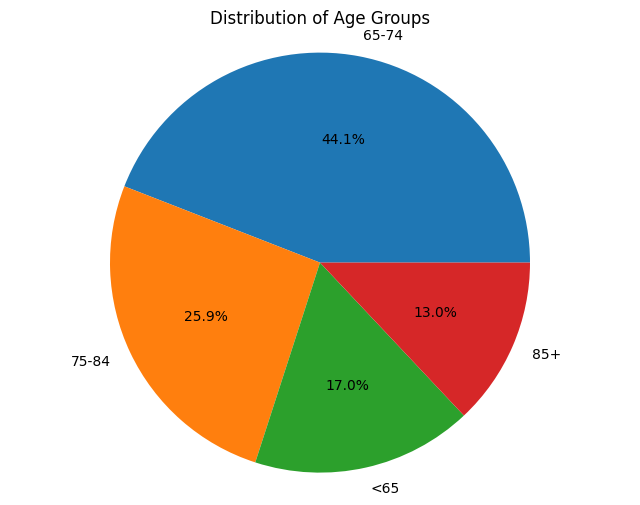

In [13]:
age_counts = Pathis_data1['age'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Age Groups')
plt.axis('equal')
plt.show()

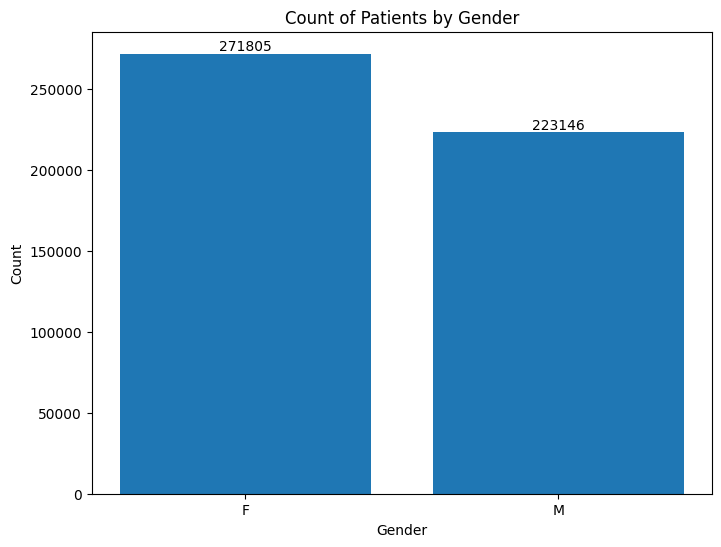

In [15]:
gender_counts = Pathis_data1['gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Patients by Gender')

# Print the count values on top of each bar
for i, count in enumerate(gender_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [16]:
print(Pathis_data1['income'].unique())

['24000-31999' '48000+' '32000-47999' '<16000' '16000-23999']


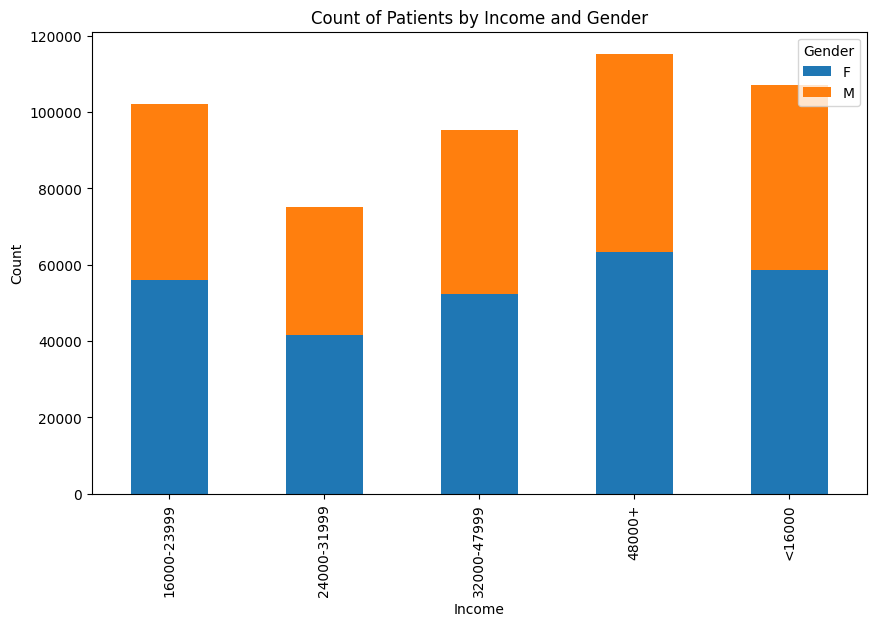

In [17]:
# Count the number of patients by income and gender
income_gender_counts = Pathis_data1.groupby(['income', 'gender']).size().unstack()

# Plot the stacked bar chart
income_gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Count of Patients by Income and Gender')

plt.legend(title='Gender', loc='upper right')

plt.show()

count    1514809.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: count, dtype: float64


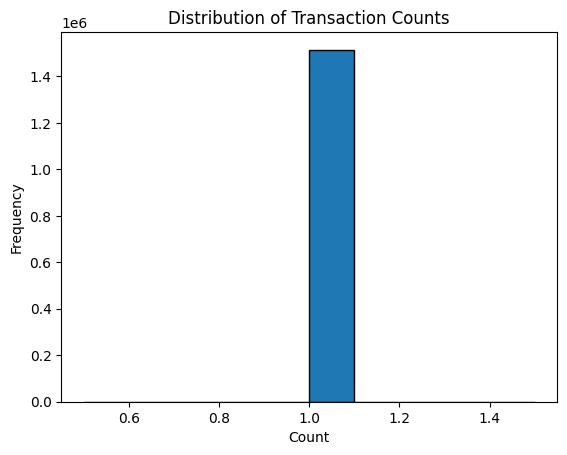

In [19]:
plt.hist(Trans_data['count'], bins=10, edgecolor='black')  # Adjust the number of bins as desired
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Counts')
plt.show()

### Hypothesis3: The average total payments for inpatient services are significantly different from outpatient service

In [21]:
# Extract the 'Average Total Payments' column from each dataset
inpatient_payments = inp_data['Average Total Payments']
outpatient_payments = outp_data['Average Total Payments']

# Perform a t-test (assuming the data follows a normal distribution)
t_statistic, p_value = stats.ttest_ind(inpatient_payments, outpatient_payments)

# Perform a Mann-Whitney U test (if the data does not follow a normal distribution)
u_statistic, p_value = stats.mannwhitneyu(inpatient_payments, outpatient_payments)

# Print the results
print("T-Test Results:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

print("\nMann-Whitney U Test Results:")
print("U-Statistic:", u_statistic)
print("P-Value:", p_value)

T-Test Results:
T-Statistic: 256.51416156243044
P-Value: 0.0

Mann-Whitney U Test Results:
U-Statistic: 7072455180.0
P-Value: 0.0


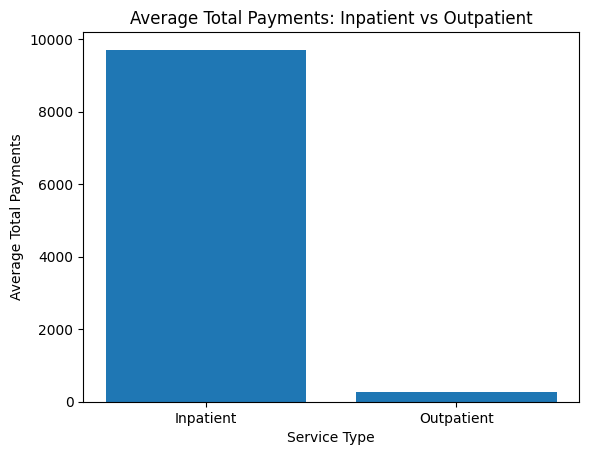

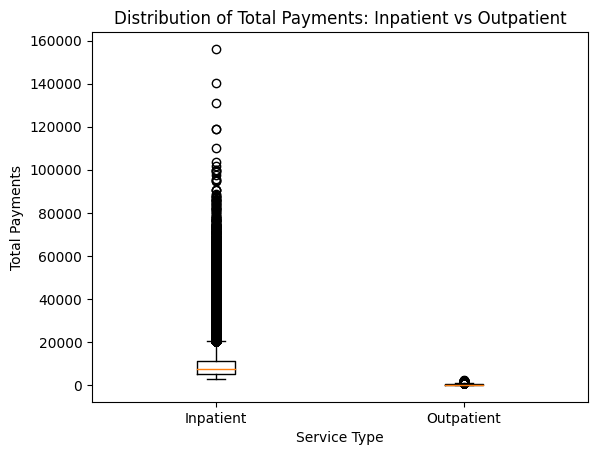

In [22]:
# Calculate the average payments for inpatient and outpatient services
avg_inpatient_payments = inp_data['Average Total Payments'].mean()
avg_outpatient_payments = outp_data['Average Total Payments'].mean()

# Create a bar plot to compare the average payments
plt.bar(['Inpatient', 'Outpatient'], [avg_inpatient_payments, avg_outpatient_payments])
plt.xlabel('Service Type')
plt.ylabel('Average Total Payments')
plt.title('Average Total Payments: Inpatient vs Outpatient')
plt.show()

# Create a box plot to visualize the distribution of payments
plt.boxplot([inp_data['Average Total Payments'], outp_data['Average Total Payments']], labels=['Inpatient', 'Outpatient'])
plt.xlabel('Service Type')
plt.ylabel('Total Payments')
plt.title('Distribution of Total Payments: Inpatient vs Outpatient')
plt.show()